# Notes
Learnings from this lesson are documented here

* An image recongnizer can be used to classify the sounds/audio, took sounds, took waveforms pictures in the phone and used to classify the sounds 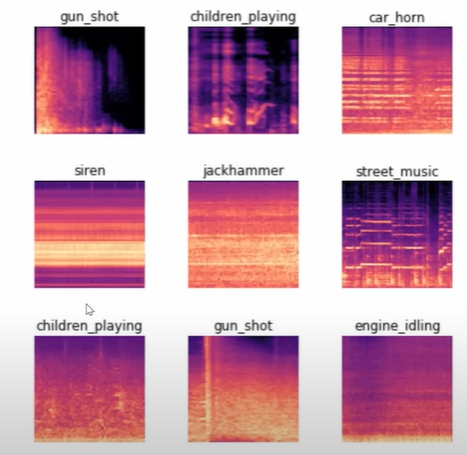

* pictures from the mouse movements are lines, dots are the clicks and speed of the movements is colours
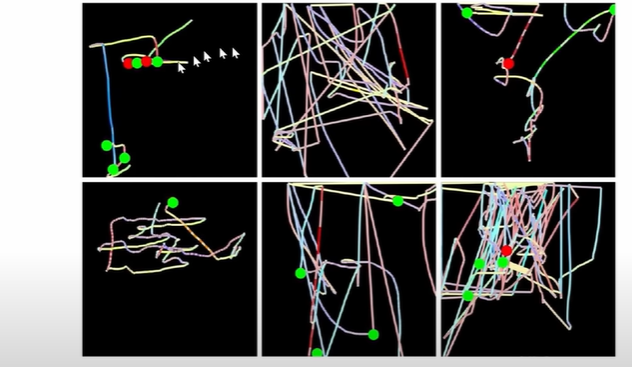

* Transfer Learning, used to train models on some data set and used to predict on some other dataset
* Fastai is library is on top of Pytorch, like Pandas on top of Numpy

* !pip list : is the bash command , starting with '!'

* Pix spy : to check the RGB colour code values for a given picture

* DATA BLOCK : It has everything at one place, what all data to go through, the labels, the data split for validation.

* **Traditional Programming vs ML Programming**
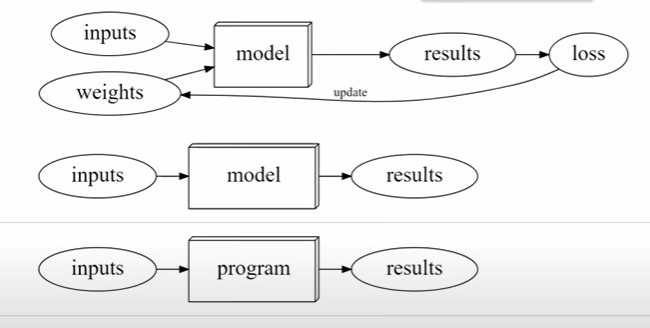

* **Metric vs Loss** : a metric is a function thtat measures quality of the models predictions; using the validation set. This is similar to the loss, which is also a measure of performance of the model. However , loss is meant ofr the optimization algorithm liks SGD to efficiently update the model paramets, while metrics are human-interpretable measures of perrformance.  Sometimes, a metric may also be a good choice for the loss.
* Overfitting : is the most challenging issue, it referes to when the model fits too closely to a limited set of data but does not generalize well to unseen data. the model can potentially memorize the dataset that the model was trained on and perform poorly on unseen data, this is why a proper validation framework is needed by splitting the data into training, validation, test sets.



# Install required packages

In [1]:
%pip install -Uqq fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:

%pip install -Uqq fastai duckduckgo_search

Note: you may need to restart the kernel to use updated packages.


In [3]:
# !pip install -Uqq torchvision
# !pip install  kaggle

# Libraries
## Below code runs in Kaggle

In [4]:
import pandas as pd

In [5]:
from duckduckgo_search import DDGS
from fastcore.all import * 


In [6]:
 
def search_images(term, max_images=30):
    global image_urls, search_results
    print(f"searching for '{term}'")
    
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=term)       
        image_urls = [result.get("image") for result in search_results[:max_images]]  
        # convert to L (functionally extended list class from fastai)
        return L(image_urls)

#     return L(DDGS(term, max_results=max_images)).itemgot('image')

In [7]:
# searching for a bird photo
DDGS()
urls = search_images('bird photos', max_images=10)
urls[0]

searching for 'bird photos'


'http://upload.wikimedia.org/wikipedia/commons/e/e6/Masked_Lovebird_(Agapornis_personata)_-Auckland_Zoo.jpg'

In [8]:
image_urls

['http://upload.wikimedia.org/wikipedia/commons/e/e6/Masked_Lovebird_(Agapornis_personata)_-Auckland_Zoo.jpg',
 'http://www.wallpapers13.com/wp-content/uploads/2019/05/Beautiful-tropical-birds-Colorful-parrots-Love-birds-parrots-on-branch-4k-ultra-hd-1610-desktop-backgrounds-for-pc-mac-laptop-tablet-mobile-phone.jpg',
 'https://www.wallpapers13.com/wp-content/uploads/2016/02/A-Beautiful-Couple-of-Lorikeet-Birds-Wallpaper-Hd.jpg',
 'https://statesymbolsusa.org/sites/statesymbolsusa.org/files/primary-images/bigstock-Curious-Bald-Eagle-60608882.jpg',
 'http://fullhdwall.com/wp-content/uploads/2016/02/Natural-Blue-Bird-Picture.jpg',
 'https://1.bp.blogspot.com/-1frXav8yFwI/XsC-1jM_bCI/AAAAAAAACzk/ORwrVPD8SUIwMIP7-ql4shxQtU1JDrsYgCPcBGAYYCw/s1600/az+kf+17.5.20.JPG',
 'https://2.bp.blogspot.com/-FLdsIv-Too8/UEgn2eFCKMI/AAAAAAAAAnQ/dQ6qlWSoJcU/s1600/Cardinal+Beautiful+Bird.jpg',
 'http://www.yourpictureframes.com/blog/wp-content/uploads/2010/02/Blue-Bird.jpg',
 'https://www.allaboutbirds.org/

In [9]:
search_results[0]

{'title': 'File:Masked Lovebird (Agapornis personata) -Auckland Zoo.jpg ...',
 'image': 'http://upload.wikimedia.org/wikipedia/commons/e/e6/Masked_Lovebird_(Agapornis_personata)_-Auckland_Zoo.jpg',
 'thumbnail': 'https://tse2.mm.bing.net/th?id=OIP.MKkCCpOaaouDkyjoTU9VSwHaHq&pid=Api',
 'url': 'http://commons.wikimedia.org/wiki/file:masked_lovebird_(agapornis_personata)_-auckland_zoo.jpg',
 'height': 1659,
 'width': 1602,
 'source': 'Bing'}

c:\Users\INDHRNA\Desktop\ML_Practical\Practical_Deep_learning\Practical_Deep_learning\.venv\lib\site-packages\curl_cffi\aio.py:204: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")
c:\Users\INDHRNA\Desktop\ML_Practical\Practical_Deep_learning\Practical_Deep_learning\.venv\lib\site-packages\curl_cffi\aio.py:204: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


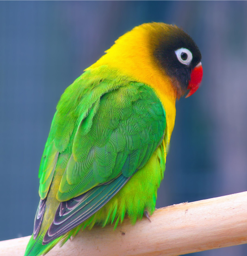

In [10]:
# download the URL and look 

from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

searching for 'forest photos'


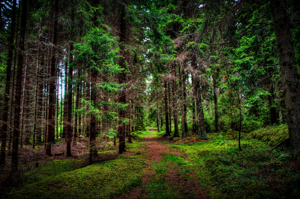

In [11]:
# same as above for forest

download_url(search_images('forest photos',max_images=1)[0], 'forest.jpg', show_progress=True)
Image.open('forest.jpg').to_thumb(300,300)

In [12]:
searches = 'bird', 'forest'
path = Path('bird_or_not')

from time import sleep

# for o in searches:
#     dest = path/o
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} photo'))
#     sleep(5)
    
#     download_images(dest, urls=search_images(f'{o} sun photo'))
#     sleep(5)
    
#     download_images(dest,urls=search_images(f'{o} shade photo'))
#     sleep(5)
    
#     resize_images(path/o, max_size=400, dest=path/o)

In [13]:


failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

c:\Users\INDHRNA\Desktop\ML_Practical\Practical_Deep_learning\Practical_Deep_learning\.venv\lib\site-packages\curl_cffi\aio.py:204: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


(#0) []

In [14]:
failed

(#0) []

In [15]:
len(failed)

0

# MODEL TRAINING
to train a model, we need DATA LOADERS, which is an object that contiains a training set - the images used to create a model, and a validation set - the images used to check the accuracy of a model -- not used during training. 
In FASTAI we can create that easily using a DATABLOCK and view sample images from it :

In [16]:
ImageBlock

<function fastai.vision.data.ImageBlock(cls: 'PILBase' = <class 'fastai.vision.core.PILImage'>)>

In [17]:
dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=143),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)
dls=dls.dataloaders(path)



In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [19]:
birdie, _, probs = learn.predict(PILImage.create('bird.jpg'))
birdie, probs

('bird', tensor([9.9997e-01, 3.2493e-05]))

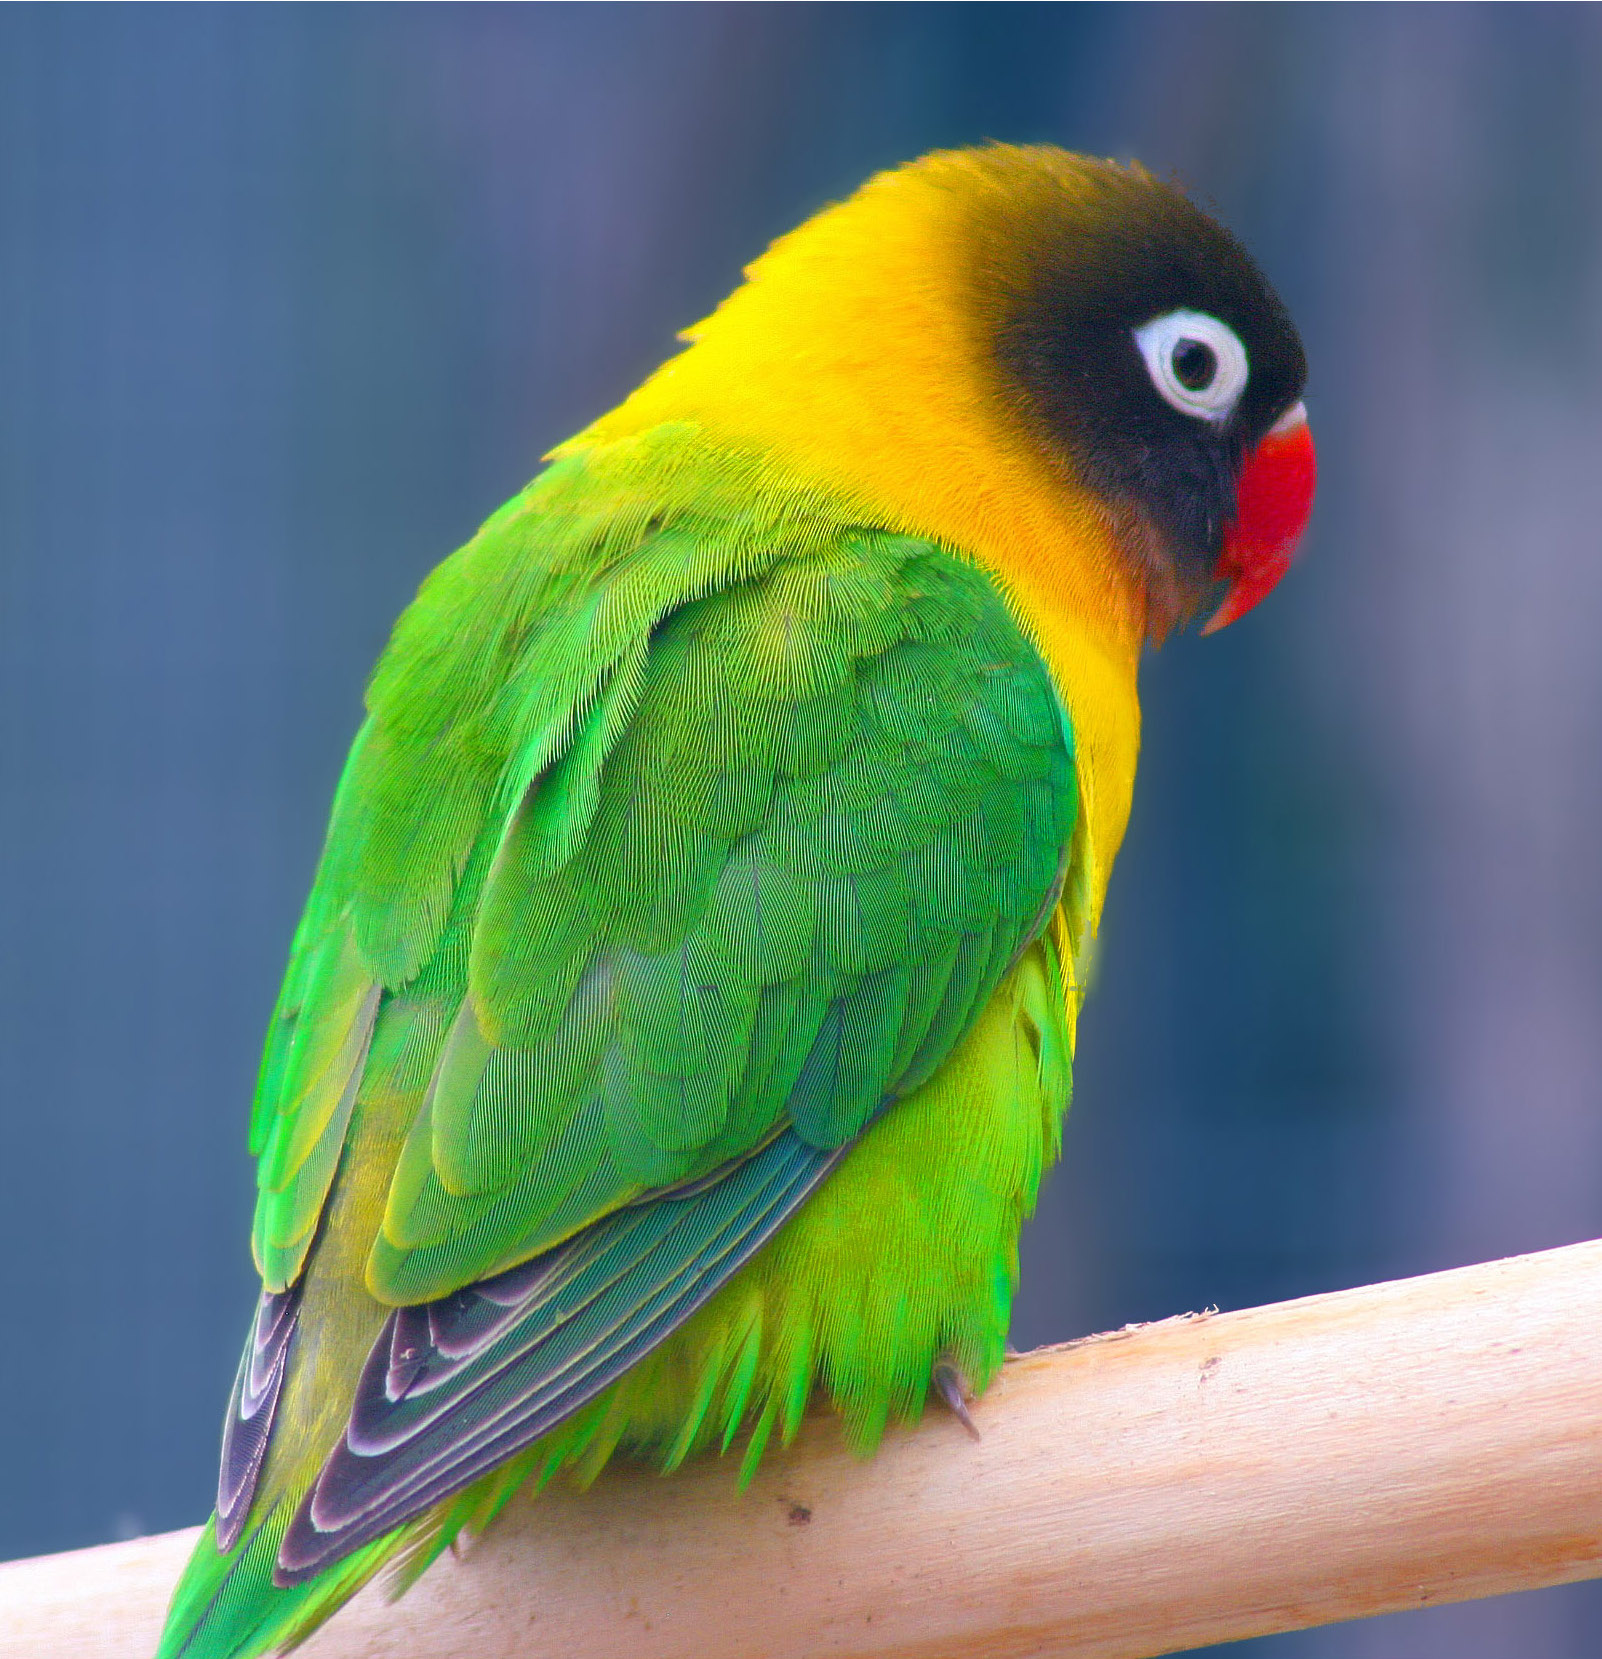

In [20]:
Image.open('bird.jpg')

# end 

In [21]:
## changes 25